In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

**Load pre processed Data**

In [ ]:
file_path = "/content/drive/MyDrive/House_Price_Prediction/data/processed/housing_featured.csv"
df = pd.read_csv(file_path)
df.head()  # Display first few rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,0.982143,-0.804819,129.0,322.0,126.0,2.344766,452600.0,False,False,True,False,-0.006387,-160.284467,2.555556
1,-122.24,37.85,1.856182,-0.535746,190.0,496.0,177.0,1.782699,352100.0,False,False,True,False,-0.003027,-354.645747,2.802260
2,-122.25,37.85,1.856182,-0.624215,235.0,558.0,219.0,0.932968,341300.0,False,False,True,False,-0.002850,-376.473097,2.547945
3,-122.25,37.85,1.856182,-0.462404,280.0,565.0,259.0,-0.012881,342200.0,False,False,True,False,-0.001785,-605.531154,2.181467
4,-122.25,37.85,1.856182,-0.786942,213.0,413.0,193.0,0.087447,269700.0,False,False,True,False,-0.004077,-270.667978,2.139896


**Define Features (X) and Target (y)**

In [ ]:
X = df.drop(columns=["median_house_value"])  # Drop target column
y = df["median_house_value"]  # Target column


**Split Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Models**

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
}

# Train all models and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R² Score": r2, "RMSE": rmse}

**Compare all models side by side**

                   R² Score          RMSE
Linear Regression  0.622899  66503.618364
Decision Tree      0.658880  63251.409402
Random Forest      0.766291  52354.593535
XGBoost            0.818723  46109.303317


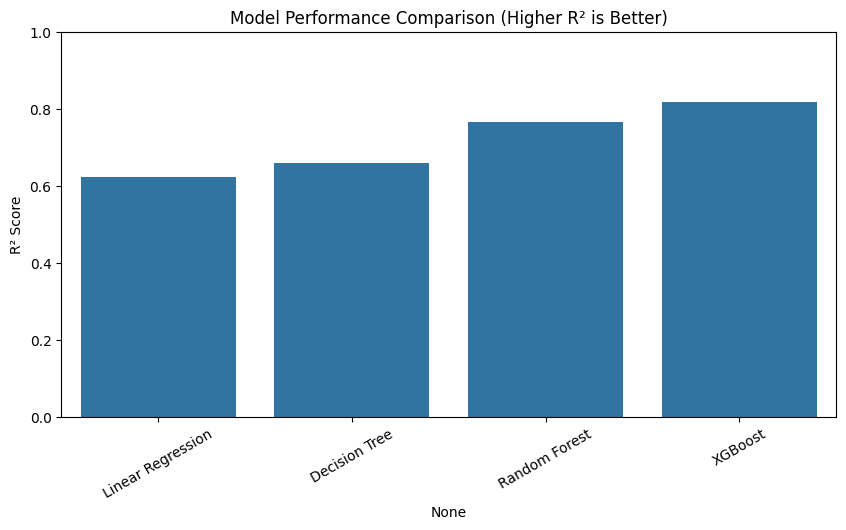

In [ ]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T

# Display results
print(results_df)

# Plot Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"])
plt.ylim(0, 1)
plt.title("Model Performance Comparison (Higher R² is Better)")
plt.ylabel("R² Score")
plt.xticks(rotation=30)
plt.show()


**Best model and save it**

In [ ]:
# Select the best model based on highest R² Score
best_model_name = results_df["R² Score"].idxmax()
best_model = models[best_model_name]

# Save best model
import joblib
joblib.dump(best_model, f"/content/drive/MyDrive/House_Price_Prediction/models/{best_model_name}.pkl")

print(f"Best Model: {best_model_name} saved successfully! 🚀")


Best Model: XGBoost saved successfully! 🚀
